In [1]:
import numpy as np
import pandas as pd
import string
import spacy
nlp = spacy.load('en_core_web_md')

In [2]:
afinn = pd.read_csv("F:\\Data Science\\Data Sets\\Afinn.csv", sep = ',', encoding = 'latin-1')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [7]:
#apple = pd.read_csv('file_location\filename.txt', delimiter = "\t")
apple = pd.read_csv('F:\\Data Science\\Data Sets\\apple.txt', delimiter = "\t")
apple

,x
0,It's amazing..... battery last around 10 -12 h...
1,Finally a MacBook possession. Got it in 50k in...
2,Best Laptop under 60k. If you don't want any a...
3,Pros:1. Light weight and super fast response t...
4,I have been a Macbook pro user for last 2 year...
5,""""
6,I am very upset about the product as I checked...
7,Reason for 1 star is I ot an defective piece. ...
8,Got the Apple Macbook air on amazon discount s...
9,White line coming on screen in just three mont...


In [8]:
apple = [x.strip() for x in apple.x]
apple = [x for x in apple if x]
apple[0:10]

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by wo

In [9]:
text_apple = ' '.join(apple)
text_apple

'It\'s amazing..... battery last around 10 -12 hrs.....best laptop for students and coders Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can\'t be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by worki

In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SUMA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(text_apple)
sentences[0:10]

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders Finally a MacBook possession.",
 'Got it in 50k in Diwali sale.',
 'Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better.',
 'Terrific sense of possession & pride.Bad News.',
 'Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!',
 '), all printers are not compatible (e.g.',
 "the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unles

In [12]:
sent_df = pd.DataFrame(sentences, columns = ['sentence'])
sent_df

,sentence
0,It's amazing..... battery last around 10 -12 h...
1,Got it in 50k in Diwali sale.
2,Technically good laptop.Good News.luxury produ...
3,Terrific sense of possession & pride.Bad News.
4,Problems will be there if you are switching fr...
...,...
209,You can get one of the best movie experiences ...
210,Overall I would it a 4.5/5.
211,"I got a great deal on this laptop, which I hav..."
212,I got it not only on discount but also was abl...


In [13]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [14]:
nlp = spacy.load('en_core_web_md')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [15]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)
sent_df

,sentence,sentiment_value
0,It's amazing..... battery last around 10 -12 h...,7
1,Got it in 50k in Diwali sale.,0
2,Technically good laptop.Good News.luxury produ...,5
3,Terrific sense of possession & pride.Bad News.,4
4,Problems will be there if you are switching fr...,-11
...,...,...
209,You can get one of the best movie experiences ...,3
210,Overall I would it a 4.5/5.,0
211,"I got a great deal on this laptop, which I hav...",3
212,I got it not only on discount but also was abl...,0


In [16]:
sent_df[sent_df.sentiment_value<0]

,sentence,sentiment_value
4,Problems will be there if you are switching fr...,-11
10,"Marketing strategy for Indian market, if at al...",-3
12,"Presently, it doesn't seem to be happening.Ove...",-2
13,"Else, think hard.",-1
27,Limited softwares available3.,-1
33,- PRO advantagesI know a lot of people might b...,-2
48,"PRO offers 8-9 hours only, while Air offers, 1...",-1
52,But if you are once in a while user of intensi...,-1
53,If you have any queries leave a comment below.,-1
57,I took it to the service centre and they infor...,-2


In [23]:
sent_df[sent_df.sentiment_value>0]

,sentence,sentiment_value,index,sentiment_value_vds
0,It's amazing..... battery last around 10 -12 h...,7,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,Technically good laptop.Good News.luxury produ...,5,2,"{'neg': 0.12, 'neu': 0.61, 'pos': 0.271, 'comp..."
3,Terrific sense of possession & pride.Bad News.,4,3,"{'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'comp..."
6,the most economical MFD laser printer RICOH SP...,1,6,"{'neg': 0.041, 'neu': 0.959, 'pos': 0.0, 'comp..."
8,Mac con not be connected to most of the projec...,1,8,"{'neg': 0.069, 'neu': 0.846, 'pos': 0.085, 'co..."
...,...,...,...,...
206,great product The elegant work of apple can be...,5,206,"{'neg': 0.0, 'neu': 0.604, 'pos': 0.396, 'comp..."
208,"Coming to the performance, the speed of this i...",2,208,"{'neg': 0.0, 'neu': 0.878, 'pos': 0.122, 'comp..."
209,You can get one of the best movie experiences ...,3,209,"{'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'comp..."
211,"I got a great deal on this laptop, which I hav...",3,211,"{'neg': 0.0, 'neu': 0.76, 'pos': 0.24, 'compou..."


In [18]:
sent_df['index'] = range(0, len(sent_df))
sent_df

,sentence,sentiment_value,index
0,It's amazing..... battery last around 10 -12 h...,7,0
1,Got it in 50k in Diwali sale.,0,1
2,Technically good laptop.Good News.luxury produ...,5,2
3,Terrific sense of possession & pride.Bad News.,4,3
4,Problems will be there if you are switching fr...,-11,4
...,...,...,...
209,You can get one of the best movie experiences ...,3,209
210,Overall I would it a 4.5/5.,0,210
211,"I got a great deal on this laptop, which I hav...",3,211
212,I got it not only on discount but also was abl...,0,212


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

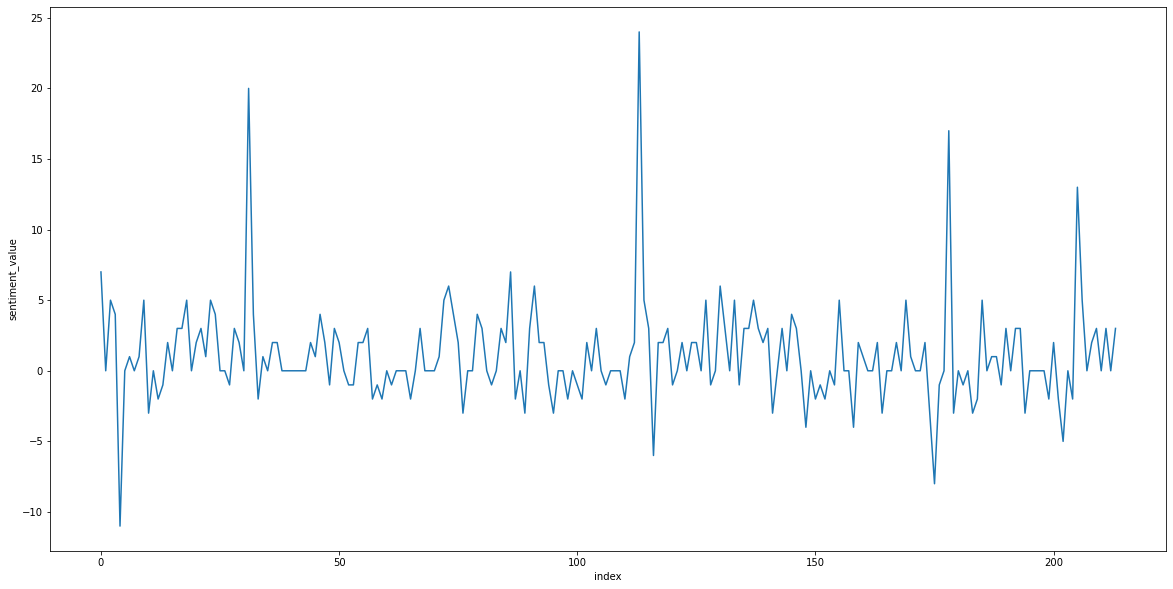

In [20]:
plt.figure(figsize = (20,10))
sns.lineplot(y = 'sentiment_value', x = 'index', data = sent_df)

In [21]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vds = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SUMA\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [22]:
sent_df['sentiment_value_vds'] = sent_df['sentence'].apply(vds.polarity_scores)
sent_df

,sentence,sentiment_value,index,sentiment_value_vds
0,It's amazing..... battery last around 10 -12 h...,7,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,Got it in 50k in Diwali sale.,0,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,Technically good laptop.Good News.luxury produ...,5,2,"{'neg': 0.12, 'neu': 0.61, 'pos': 0.271, 'comp..."
3,Terrific sense of possession & pride.Bad News.,4,3,"{'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'comp..."
4,Problems will be there if you are switching fr...,-11,4,"{'neg': 0.182, 'neu': 0.742, 'pos': 0.076, 'co..."
...,...,...,...,...
209,You can get one of the best movie experiences ...,3,209,"{'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'comp..."
210,Overall I would it a 4.5/5.,0,210,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
211,"I got a great deal on this laptop, which I hav...",3,211,"{'neg': 0.0, 'neu': 0.76, 'pos': 0.24, 'compou..."
212,I got it not only on discount but also was abl...,0,212,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [26]:
sent_df.sort_values('sentiment_value').head()

,sentence,sentiment_value,index,sentiment_value_vds
4,Problems will be there if you are switching fr...,-11,4,"{'neg': 0.182, 'neu': 0.742, 'pos': 0.076, 'co..."
175,This is the worst apple product I have ever s...,-8,175,"{'neg': 0.143, 'neu': 0.829, 'pos': 0.028, 'co..."
116,"?, god damn it apple (Though its not bad, have...",-6,116,"{'neg': 0.058, 'neu': 0.831, 'pos': 0.112, 'co..."
202,The device never had any accidental drop or sh...,-5,202,"{'neg': 0.248, 'neu': 0.687, 'pos': 0.065, 'co..."
148,Requires power input to restart again.Contacte...,-4,148,"{'neg': 0.213, 'neu': 0.787, 'pos': 0.0, 'comp..."


In [27]:
sent_df.sort_values('sentiment_value').tail()

,sentence,sentiment_value,index,sentiment_value_vds
0,It's amazing..... battery last around 10 -12 h...,7,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
205,MERITS..IT IS BEST IN ITS PERFORMANCE..SOUND Q...,13,205,"{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'comp..."
178,..So now I m working with the external keyboar...,17,178,"{'neg': 0.017, 'neu': 0.778, 'pos': 0.204, 'co..."
31,Basically i will be comparing this with a regu...,20,31,"{'neg': 0.065, 'neu': 0.728, 'pos': 0.207, 'co..."
113,"All are Gud.. For now.. Apple,apple,apple, tha...",24,113,"{'neg': 0.011, 'neu': 0.836, 'pos': 0.153, 'co..."


In [55]:
sent_df[sent_df['index'] == 113]

,sentence,sentiment_value,index,sentiment_value_vds
113,"All are Gud.. For now.. Apple,apple,apple, tha...",24,113,"{'neg': 0.011, 'neu': 0.836, 'pos': 0.153, 'co..."


In [35]:
words = tokenize.word_tokenize(text_apple)
words

['It',
 "'s",
 'amazing',
 '.....',
 'battery',
 'last',
 'around',
 '10',
 '-12',
 'hrs',
 '.....',
 'best',
 'laptop',
 'for',
 'students',
 'and',
 'coders',
 'Finally',
 'a',
 'MacBook',
 'possession',
 '.',
 'Got',
 'it',
 'in',
 '50k',
 'in',
 'Diwali',
 'sale',
 '.',
 'Technically',
 'good',
 'laptop.Good',
 'News.luxury',
 'product',
 ',',
 'niche',
 'technology',
 ',',
 'good',
 'battery',
 'life',
 ',',
 'reliable',
 'machine',
 '(',
 'other',
 'laptops',
 'crash',
 'and',
 'become',
 'defunct',
 'in',
 '6-10',
 'years',
 ')',
 ',',
 'no',
 'anti-virus',
 'required',
 ',',
 'security',
 'of',
 'data',
 'and',
 'transactions',
 'much',
 'better',
 '.',
 'Terrific',
 'sense',
 'of',
 'possession',
 '&',
 'pride.Bad',
 'News',
 '.',
 'Problems',
 'will',
 'be',
 'there',
 'if',
 'you',
 'are',
 'switching',
 'from',
 'windows',
 'based',
 'system',
 '-',
 'very',
 'less',
 'space',
 'in',
 'hard',
 'disk',
 ',',
 'no',
 'CD',
 'drive',
 ',',
 'inability',
 'to',
 'transfer',
 'd

In [36]:
word_df = pd.DataFrame(words, columns = ['word'])
word_df

,word
0,It
1,'s
2,amazing
3,.....
4,battery
...,...
4722,was
4723,a
4724,good
4725,purchase


In [39]:
word_df['sentiment_value'] = word_df['word'].apply(calculate_sentiment)
word_df

,word,sentiment_value
0,It,0
1,'s,0
2,amazing,4
3,.....,0
4,battery,0
...,...,...
4722,was,0
4723,a,0
4724,good,3
4725,purchase,0


In [42]:
word_df_pos = word_df[word_df.sentiment_value>0]
word_df_pos

,word,sentiment_value
2,amazing,4
11,best,3
31,good,3
32,laptop.Good,3
39,good,3
...,...,...
4600,elegant,2
4638,remarkable,2
4664,best,3
4680,great,3


In [52]:
word_df_pos.value_counts().head(10)

word       sentiment_value
good       3                  22
like       2                  10
want       1                   9
best       3                   8
fine       2                   8
great      3                   6
awesome    4                   4
free       1                   4
support    2                   3
perfectly  3                   3
dtype: int64

In [45]:
word_df_neg = word_df[word_df.sentiment_value<0]
word_df_neg

,word,sentiment_value
48,crash,-2
57,no,-1
58,anti-virus,-1
74,pride.Bad,-3
77,Problems,-2
...,...,...
4478,drop,-1
4480,shock,-2
4508,left,-1
4510,no,-1


In [54]:
word_df_neg.value_counts().head(10)

word          sentiment_value
no            -1                 14
hard          -1                  9
stopped       -1                  7
problem       -2                  5
bad           -3                  5
dead          -3                  4
pay           -1                  4
problems      -2                  3
disappointed  -2                  3
Cut           -1                  2
dtype: int64